In [1]:
%pylab inline

# (c) 2014 Reid Johnson and Everaldo Aguiar
#
# Functions to work with continuous data and linear regression models.

import matplotlib.pyplot as pl

def pairs(data):
    """Generates and shows a pairwise scatterplot of the dataset features.

    A figure with nxn scatterplots is generated, where n is the number of features. The features are
    defined as the all columns excluding the final column, which is defined as the class.

    Args:
      data (array): A dataset.

    """
    i = 1

    # Divide columns into features and class.
    features = list(data.columns)
    classes = features[-1] # create class column
    del features[-1] # delete class column from feature vector

    # Generate an nxn subplot figure, where n is the number of features.
    figure = pl.figure(figsize=(5*(len(data.columns)-1), 4*(len(data.columns)-1)))
    for col1 in data[features]:
        for col2 in data[features]:
            ax = pl.subplot(len(data.columns)-1, len(data.columns)-1, i)
            if col1 == col2:
                ax.text(2.5, 4.5, col1, style='normal', fontsize=20)
                ax.axis([0, 10, 0, 10])
                pl.xticks([]), pl.yticks([])
            else:
                for name in data[classes]:
                    cond = data[classes] == name
                    ax.plot(data[col2][cond], data[col1][cond], linestyle='none', marker='o', label=name)
                #t = plt.title(name)
            i += 1

    pl.show()

Populating the interactive namespace from numpy and matplotlib


In [4]:
import pandas as pd

fileURL='http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris=pd.read_csv(fileURL,names=['SepalLength','SepalWidth','PetalLength','PetalWidth','Species'],header=None)

iris = iris.dropna()

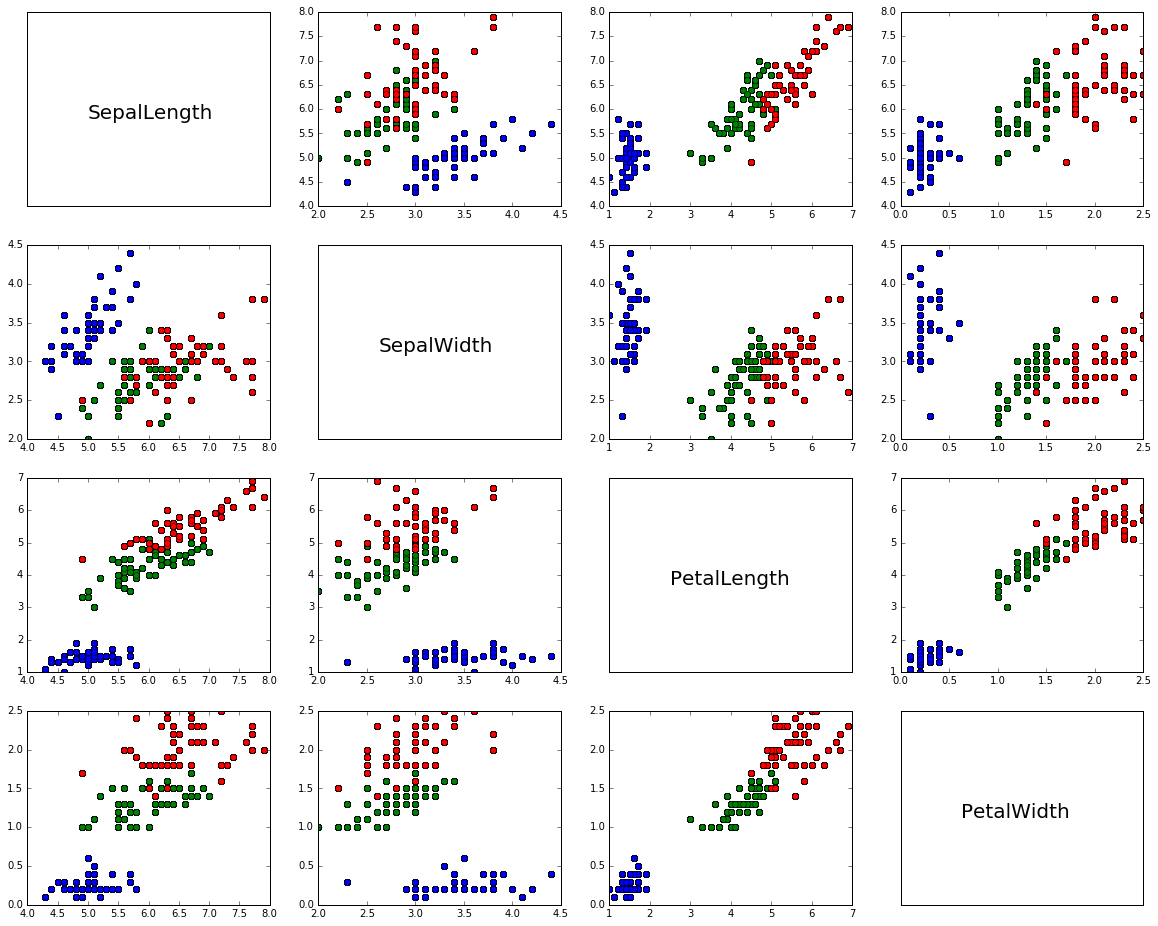

In [5]:
# A scatterplot matrix of scatterplots, with one scatterplot for each pairwise combination
# of features

pairs(iris)

('Coefficients: \n', array([[-0.05918918]]))
Mean squared error: 0.12
Variance score: -0.04


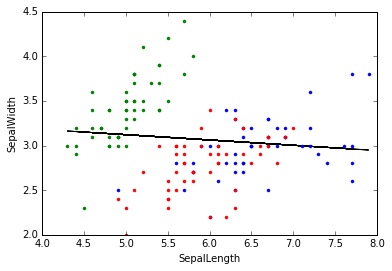

('Coefficients: \n', array([[ 1.90604073]]))
Mean squared error: 0.59
Variance score: 0.78


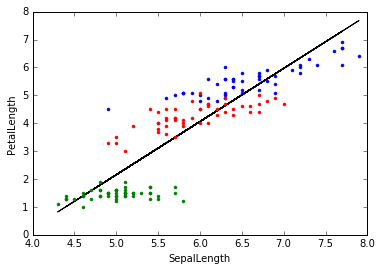

('Coefficients: \n', array([[ 0.75583314]]))
Mean squared error: 0.17
Variance score: 0.68


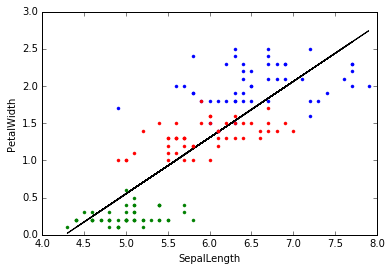

('Coefficients: \n', array([[-0.18683312]]))
Mean squared error: 0.74
Variance score: -0.06


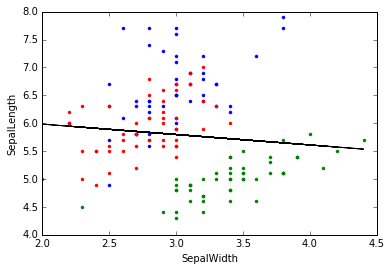

('Coefficients: \n', array([[-1.72524541]]))
Mean squared error: 2.49
Variance score: 0.06


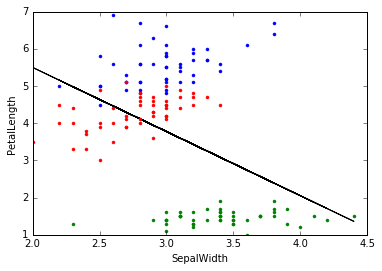

('Coefficients: \n', array([[-0.65268886]]))
Mean squared error: 0.57
Variance score: -0.03


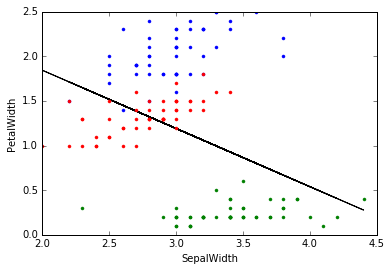

('Coefficients: \n', array([[ 0.39400581]]))
Mean squared error: 0.16
Variance score: 0.76


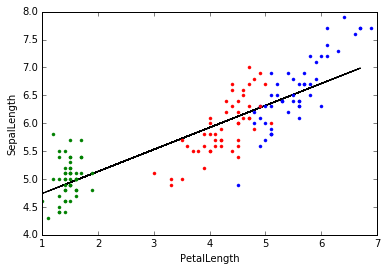

('Coefficients: \n', array([[-0.11298215]]))
Mean squared error: 0.11
Variance score: 0.03


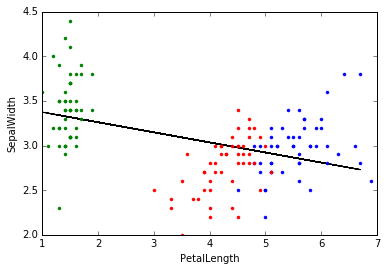

('Coefficients: \n', array([[ 0.40845462]]))
Mean squared error: 0.05
Variance score: 0.92


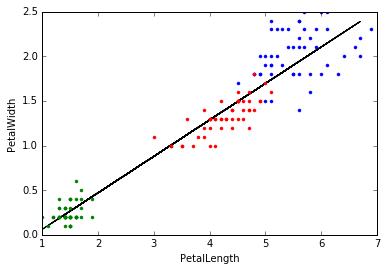

('Coefficients: \n', array([[ 0.86864534]]))
Mean squared error: 0.22
Variance score: 0.68


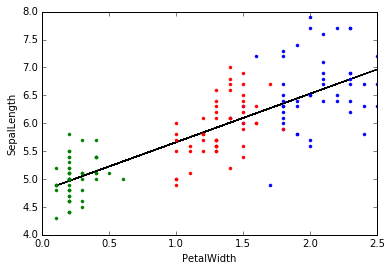

('Coefficients: \n', array([[-0.23763547]]))
Mean squared error: 0.13
Variance score: -0.09


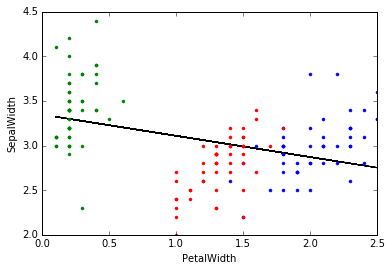

('Coefficients: \n', array([[ 2.27085776]]))
Mean squared error: 0.22
Variance score: 0.92


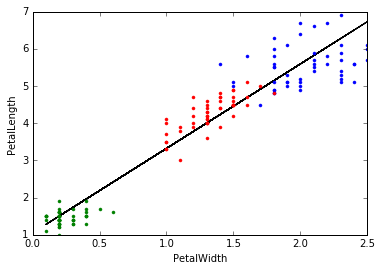

In [126]:
# A plot of the linear regression models generated on each pairwise combination of features,
# with corresponding model statistics.

from sklearn.cross_validation import train_test_split
from sklearn import datasets, linear_model
import numpy as np

train, test = train_test_split(iris)
train = np.array(train)
test = np.array(test)

for f_a in range(4):
    for f_b in range(4):
        if f_a == f_b: continue

        train_X = train[:, (f_a,)]
        train_Y = train[:, (f_b,)]
        test_X = test[:, (f_a,)]
        test_Y = test[:, (f_b,)]

        # Train model using training data
        regr = linear_model.LinearRegression()
        regr.fit(train_X, train_Y)
        
        # The coefficients
        print('Coefficients: \n', regr.coef_)
        # The mean squared error
        print("Mean squared error: %.2f"
              % np.mean((regr.predict(test_X) - test_Y) ** 2))
        # Explained variance score: 1 is perfect prediction
        print('Variance score: %.2f' % regr.score(test_X, test_Y))

        # Plot outputs
        pl.plot(train_X, regr.predict(train_X), color='black')
        for flower in set(iris['Species']):
            pl.xlabel(iris.columns[f_a])
            pl.ylabel(iris.columns[f_b])
            pl.plot(iris.iloc[:, f_a][flower == iris['Species']],
                    iris.iloc[:, f_b][flower == iris['Species']], 
                    marker='.', linestyle='none')
            
        plt.show()


Provide a plot of the best overall linear regression model you were able to generate using any
combination of features (including the use of multiple features used in combination to
predict a single feature), with corresponding model statistics.

## Best overall linear regression model
In order to find out the model that best classifies the Iris dataset, we may look into the mean squared error associated with each feature pair above. In the above model, the minimum mean square error computed is 0.05, as indicated by the graph "PetalWidth (y-axis) vs PetalLength (x-axis)", with a variance score 0.92. 

To further find the best model, I need to try to combine multiple features to predict a single feature and see whether an even lower MSE is achievable. 

The following code block combines 2 and 3 features respectively to predict a single feature.



In [135]:
train, test = train_test_split(iris)
train = np.array(train)
test = np.array(test)

# Current min value of MSE
min_mse = 0.05

# Combine 2 features to predict a single feature
for f_a in range(4):
    for f_b in range(4):
        if f_a == f_b: continue
        for f_c in range(4):
            if f_c == f_b or f_c == f_a: continue
            train_X = train[:, (f_a,f_c,)]
            train_Y = train[:, (f_b,)]
            test_X = test[:, (f_a,f_c,)]
            test_Y = test[:, (f_b,)]

            # Train model using training data
            regr = linear_model.LinearRegression()
            regr.fit(train_X, train_Y)

            if np.mean((regr.predict(test_X) - test_Y) ** 2) < min_mse:
                min_mse = np.mean((regr.predict(test_X) - test_Y) ** 2)
                # The coefficients
                print('Coefficients: \n', regr.coef_)
                # The mean squared error
                print("Mean squared error: %.2f"
                      % np.mean((regr.predict(test_X) - test_Y) ** 2))
                # Explained variance score: 1 is perfect prediction
                print('Variance score: %.2f' % regr.score(test_X, test_Y))
                

# Combine 3 features to predict a single feature
for f_a in range(4):
    for f_b in range(4):
        if f_a == f_b: continue
        for f_c in range(4):
            if f_c == f_b or f_c == f_a: continue
            for f_d in range(4):
                if f_d == f_c or f_d == f_b or f_d == f_a: continue
                train_X = train[:, (f_a,f_c,)]
                train_Y = train[:, (f_b,)]
                test_X = test[:, (f_a,f_c,)]
                test_Y = test[:, (f_b,)]

                # Train model using training data
                regr = linear_model.LinearRegression()
                regr.fit(train_X, train_Y)

                if np.mean((regr.predict(test_X) - test_Y) ** 2) < min_mse:
                    min_mse = np.mean((regr.predict(test_X) - test_Y) ** 2)
                    # The coefficients
                    print('Coefficients: \n', regr.coef_)
                    # The mean squared error
                    print("Mean squared error: %.2f"
                          % np.mean((regr.predict(test_X) - test_Y) ** 2))
                    # Explained variance score: 1 is perfect prediction
                    print('Variance score: %.2f' % regr.score(test_X, test_Y))

print 'Min MSE is: %.2f' % min_mse

Min MSE is: 0.05


As we may see, even if we combine multiple features to predict, the MSE did not get any better than the previously computed 0.05. Therefore we may conclude that the best results is generated by "PetalWidth vs PetalLength". The following code block will generate the best model.

('Coefficients: \n', array([[ 0.41515819]]))
Mean squared error: 0.05
Variance score: 0.92


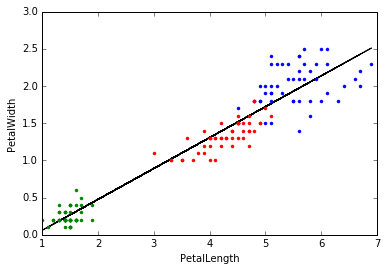

In [124]:
f_a = 2 # PetalLength
f_b = 3 # PetalWidth

train_X = train[:, (f_a,)]
train_Y = train[:, (f_b,)]
test_X = test[:, (f_a,)]
test_Y = test[:, (f_b,)]

# Train model using training data
regr = linear_model.LinearRegression()
regr.fit(train_X, train_Y)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(test_X) - test_Y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(test_X, test_Y))

# Plot outputs
pl.plot(train_X, regr.predict(train_X), color='black')
for flower in set(iris['Species']):
    pl.xlabel(iris.columns[f_a])
    pl.ylabel(iris.columns[f_b])
    pl.plot(iris.iloc[:, f_a][flower == iris['Species']],
            iris.iloc[:, f_b][flower == iris['Species']], 
            marker='.', linestyle='none')

plt.show()

## Given this output, respond to the following questions:
Q: Based upon the linear models you generated, which pair of features appear to be most predictive for one another? Note that you can answer this question based upon the output provided for the linear models.

A: Based on the outputs generated above, I may conclude that "Petal Width and Petal Length" is the pair that most predictive for one another. The MSE for this pair is very low, and variance is very high, which indicates that this pair describes the majority of the variabilities within this dataset and the prediction model based on this pair is accurate.

Q: Suppose you tried to generate a classification model on this dataset, but only after removing the feature that you were best able to predict based upon other features. How would removing this feature affect the classification performance?

A: Personally I think the effect will not be significant for this iris dataset. If we look at the scatter plots generated initially, we may find that all features to some degree describe the dataset. Therefore removing the target feature that has best prediction result does not necessarily mean that there will be no way to reach the same or close performance anymore. Instead, we may choose some other feature as the new target feature and use combination of features to predict that single feature, just like what we did above. In this way we may still be able to reach a reasonably good prediction performance even without the best feature. 

However, I don't think this is a general conclusion for all datasets, and we should always look into the scenarios carefully on a case-by-case basis. But at the end of the day it's always ideal to maintain the best feature instead of throwing it away.